# SC1015 DSAI Mini Project
## Part 2: Exploratory Data Analysis
---
In this section, we explore our dataset more generally. We explore both variables related to conventionality (`6` in total) as well as variables related to success (`2` in total) to answer questions like are there any patterns we are noticing? What do our success variables look like? What about the conventionality variables? Are there any underlying relationships between them? Can we make any inferences for our question at this stage? This is going to help us in the later sections of our project as well as eventually answer the question we posed.

**Question:** Does Being Unconventional Determine Success?

**Dataset:** [Stack Overflow Developer Survey 2020 on Kaggle](https://www.kaggle.com/aitzaz/stack-overflow-developer-survey-2020)

## Table of Contents:
1. [Exploring `ConvertedComp`](#1\.-Exploring-ConvertedComp)
2. [Exploring `JobSat`](#2\.-Exploring-JobSat)
3. [Exploring Relationships between `JobSat` and `ConvertedComp`](#3\.-Exploring-Relationships-between-JobSat-and-ConvertedComp)
4. [Exploring Variables Related to Conventionality](#4\.-Exploring-Variables-Related-to-Conventionality)

In [2]:
#Basic Libraries
import pandas as pd
import numpy as np

import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

In [3]:
resp_data = pd.read_pickle('success_vars_data.pickle')
resp_data

,ConvertedComp,JobSat
0,116000.0,1
1,32315.0,4
2,40070.0,1
3,66000.0,2
4,83400.0,1
...,...,...
19357,2000000.0,0
19358,75396.0,4
19359,2508.0,4
19360,70000.0,4


In [4]:
conv_comp=pd.DataFrame(resp_data['ConvertedComp'])
job_sat=pd.DataFrame(resp_data['JobSat'])

### 1. Exploring `ConvertedComp`

ConvertedComp represents the respondents' total annual compensation (salary, bonuses, and perks, before taxes and deductions). 

In [5]:
conv_comp.describe()

,ConvertedComp
count,1.936200e+04
mean,1.051504e+05
std,2.340375e+05
min,0.000000e+00
25%,2.494800e+04
50%,5.404900e+04
75%,9.600000e+04
max,2.000000e+06


<AxesSubplot:>

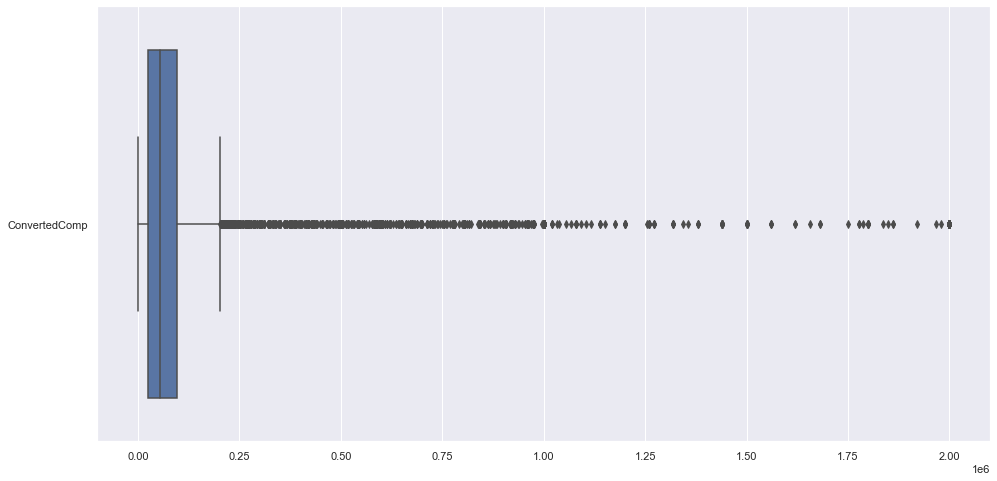

In [6]:
#Box Plot
f = plt.figure(figsize=(16,8))
sb.boxplot(data=conv_comp, orient='h')

<AxesSubplot:ylabel='Density'>

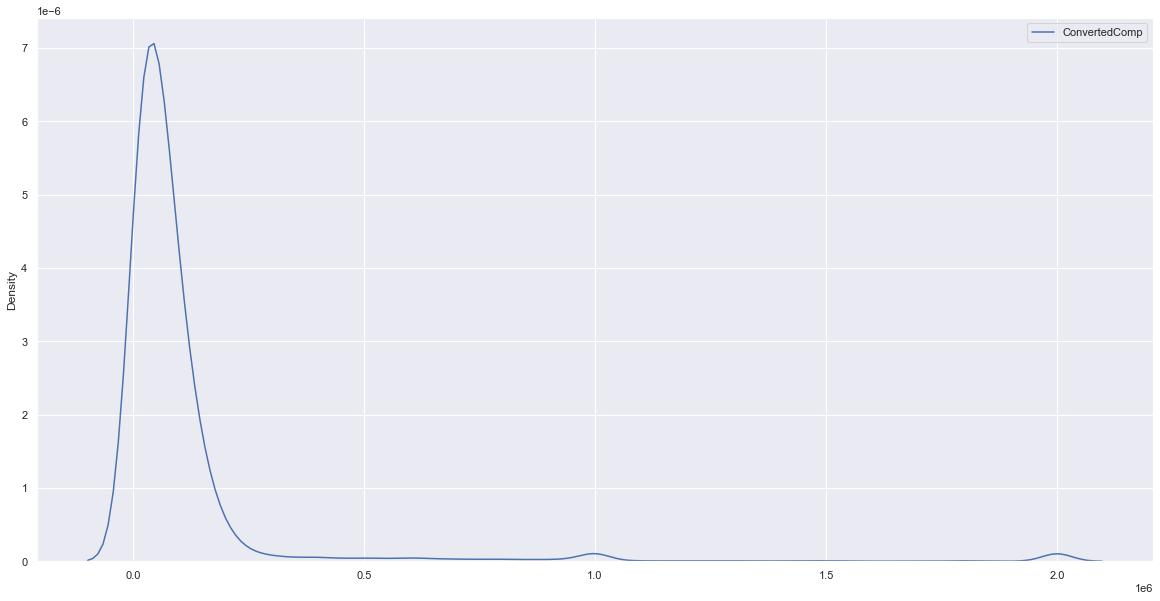

In [7]:
#KDE plot
f = plt.figure(figsize=(20,10))
sb.kdeplot(data=conv_comp)

#### We can deduce that:

The ConvertedComp values are clustered around the median of 54,049 USD annually

As shown in the KDE plot and boxplot, there are many outliers in the compensation value, especially on the right.

The outliers on the right have a large spread, whereas the data clustered around the median have a small spread.



Outliers are important for us to perform anamoly detection, thus we won't remove them

### 2. Exploring `JobSat`

JobSat represents the job satisfaction of respondents on a scale of 0 to 4

Initially, JobSat was a categorical variable with values "Very dissatisfied","Slightly dissatisfied","Neither satisfied nor dissatisfied","Slightly satisfied" and "Very satisfied". 

For ease in using the data, we decided to convert it to ratings in numerical values accordingly (with 0 representing "Very dissatisfied" and 4 representing "Very satisfied).

In [8]:
job_sat.describe()

,JobSat
count,19362.000000
mean,2.325741
std,1.376129
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,4.000000


<AxesSubplot:xlabel='JobSat', ylabel='Count'>

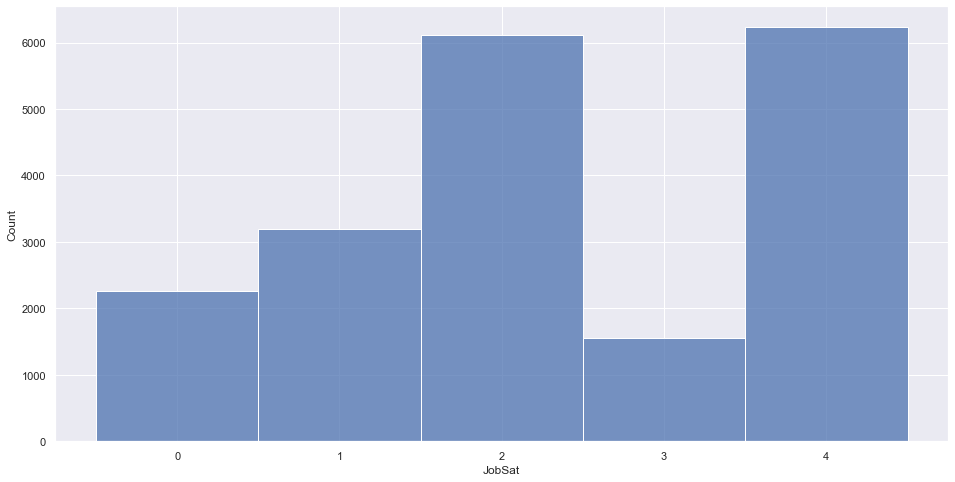

In [9]:
#Histogram plot
f = plt.figure(figsize=(16,8))
cat_job_sat=resp_data['JobSat'].astype('category')
sb.histplot(data = cat_job_sat)

#### We can deduce that: 

The ratings with highest frequency are 4 and 2.

The ratings with lowest frequency are 3 and 0.

The mean rating given is 2.3



### 3. Exploring Relationships between `JobSat` and `ConvertedComp`

Correlation between JobSat and ConvertedComp:
                  JobSat  ConvertedComp
JobSat         1.000000       0.033133
ConvertedComp  0.033133       1.000000


<AxesSubplot:xlabel='ConvertedComp', ylabel='JobSat'>

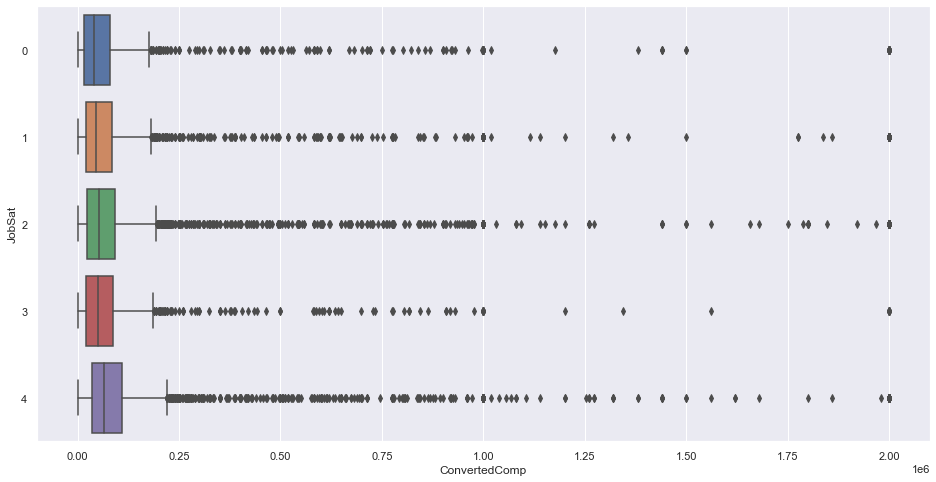

In [10]:
js_cc=pd.DataFrame(resp_data[['JobSat','ConvertedComp']])

#Correlation
print("Correlation between JobSat and ConvertedComp:\n", js_cc.corr())

#Boxplot
js_cc['JobSat']=js_cc['JobSat'].astype('category')
f = plt.figure(figsize=(16,8))
sb.boxplot(data=js_cc, y="JobSat", x="ConvertedComp", orient = "h")


Most JobSat ratings have many outliers towards the right of the box and whiskers. This is due to the many outliers in ConvertedComp.

There is a weak correlation between JobSat and ConvertedComp.

However, the boxplot shows that in comparison to the other ratings,
the lowest rating (0) is slightly more frequent in lower values of ConvertedComp and the highest rating (4) is slightly more frequent in the higher values of ConvertedComp.

### 4. Exploring Variables Related to Conventionality

For the variables related to conventionality, we plot a bar plot for each of the `6` variables which gives us a general idea of how the data looks like. 

In [11]:
conv_vars_df = pd.read_pickle('conv_vars_data.pickle')
conv_vars_df

DatabaseWorkedWith                                                    \
               Cassandra Couchbase DynamoDB Elasticsearch Firebase IBM DB2   
0                      0         0        0             0        0       0   
1                      0         0        0             0        0       0   
2                      0         0        0             0        1       0   
3                      0         0        0             0        1       0   
4                      0         0        0             0        0       0   
...                  ...       ...      ...           ...      ...     ...   
19357                  0         0        0             0        0       0   
19358                  1         0        1             1        0       0   
19359                  0         0        0             0        0       0   
19360                  0         0        0             0        1       0   
19361                  0         0        0             0        0       0   

                                                  ... WebframeWorkedWith  \
      MariaDB Microsoft SQL Server MongoDB MySQL  ...            Express   
0           1                    0       0     1  ...                  0   
1           0                    1       0     0  ...                  0   
2           0                    0       1     0  ...                  0   
3           0                    1       0     0  ...                  0   
4           1                    1       0     0  ...                  0   
...       ...                  ...     ...   ...  ...                ...   
19357       1                    1       1     0  ...                  1   
19358       1                    0       1     1  ...                  0   
19359       0                    1       0     0  ...                  0   
19360       0                    0       1     1  ...                  0   
19361       0                    0       0     1  ...                  0   

                                                                                
      Flask Gatsby Laravel React.js Ruby on Rails Spring Symfony Vue.js jQuery  
0         1      0       0        0             0      0       0      0      0  
1         1      0       0        0             0      0       0      0      1  
2         0      0       0        1             0      0       0      0      0  
3         0      0       0        0             0      0       0      1      0  
4         0      0       0        0             0      0       0      0      0  
...     ...    ...     ...      ...           ...    ...     ...    ...    ...  
19357     1      1       0        1             0      0       0      1      0  
19358     0      0       0        1             0      0       0      0      0  
19359     0      0       0        0             0      0       0      0      0  
19360     0      0       0        1             1      0       0      0      1  
19361     0      0       0        0             0      0       0      0      1  

[19362 rows x 94 columns]

In [12]:
# conv_vars_df has multi level (2) column labels
# extracting labels for each level 

all_cols = []
for col_tuple in conv_vars_df:
    all_cols.append(col_tuple[0])
unique_cols = list(set(all_cols))

In [26]:
counts = {}

# iterating through each of the 6 variables and creating a separate DataFrame for each
# the DataFrame contains the count of each option

for col_top in unique_cols:
    counts[col_top] = pd.DataFrame()
    
    # getting and setting the counts
    for col in conv_vars_df[col_top].columns:
        count = 0
        for val in conv_vars_df[col_top][col]:
            if val:
                count += 1
        counts[col_top][col] = [count]
    

    counts[col_top] = counts[col_top].transpose()
    
    counts[col_top].columns = ['count']
    
    counts[col_top][col_top] = counts[col_top].index
    
    counts[col_top].reset_index(inplace=True, drop=True)
    
    counts[col_top] = counts[col_top].sort_values(by=['count'], ascending=False)

## An Example:

In [25]:
counts['DatabaseWorkedWith']

,count,DatabaseWorkedWith
9,10177,MySQL
7,8284,Microsoft SQL Server
11,8195,PostgreSQL
8,6244,MongoDB
13,5990,SQLite
12,4982,Redis
3,3710,Elasticsearch
6,3491,MariaDB
10,3027,Oracle
4,2925,Firebase


### We now plot a barplot showing options within the 6 variables and their counts ordered from highest count to lowest

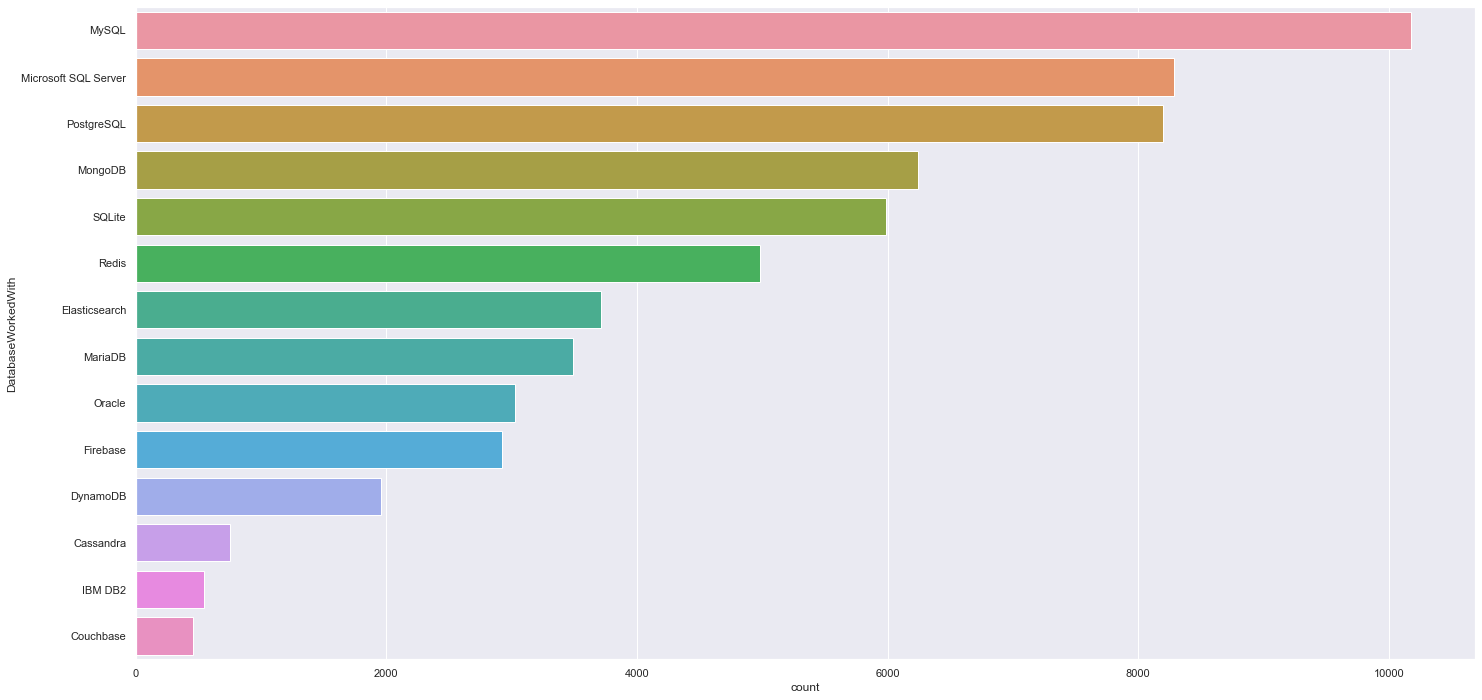

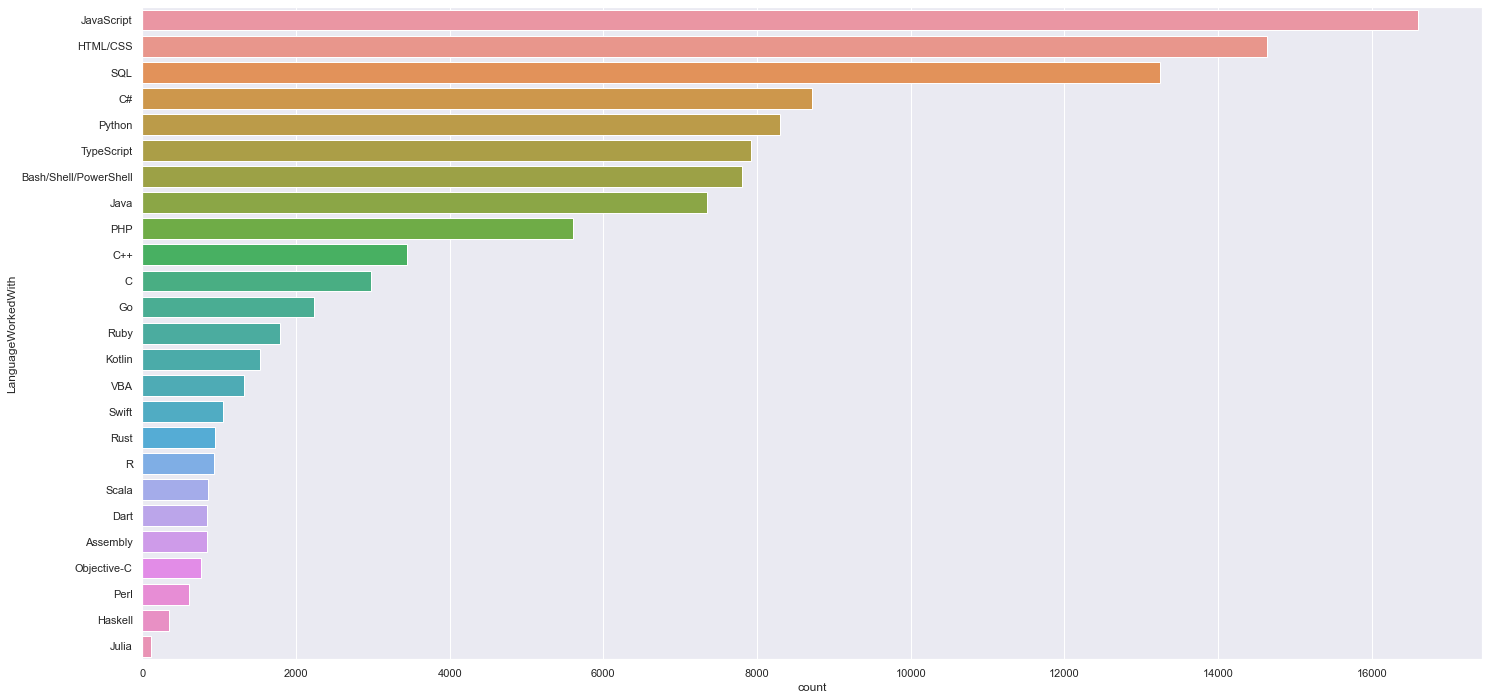

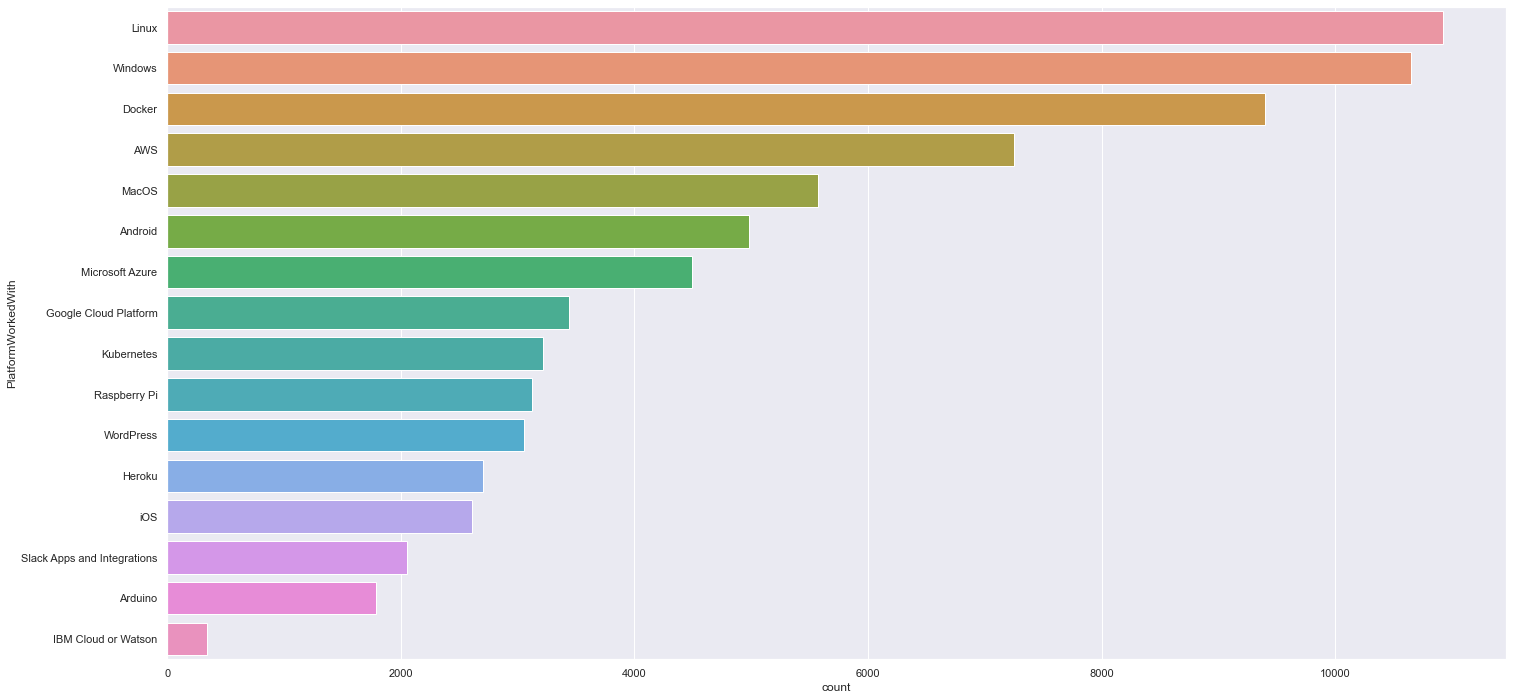

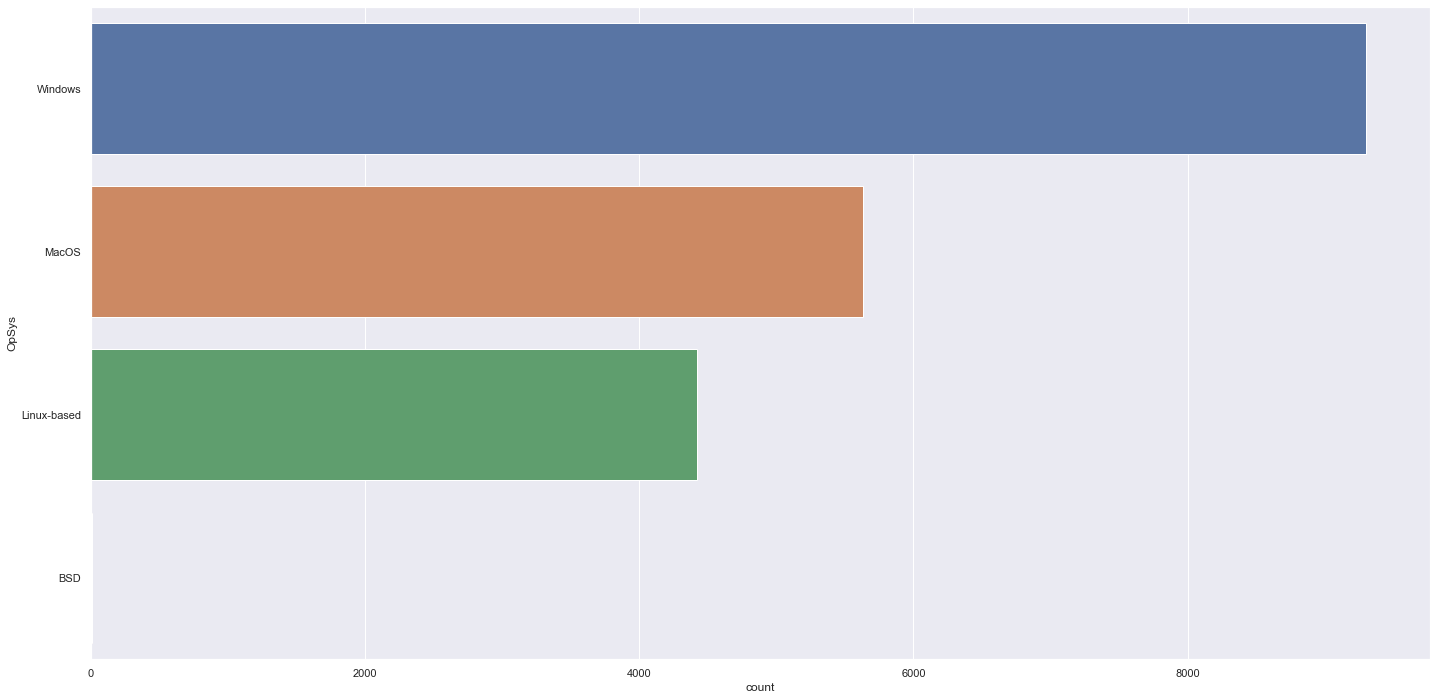

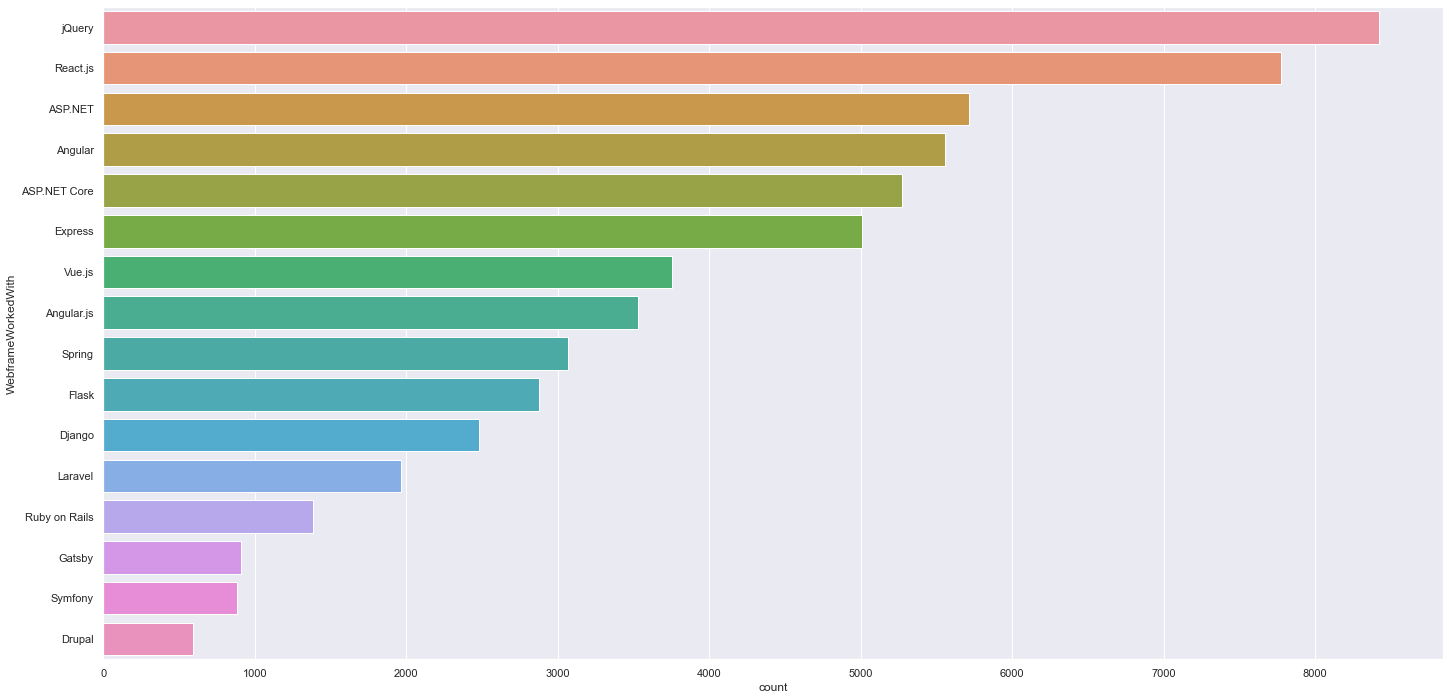

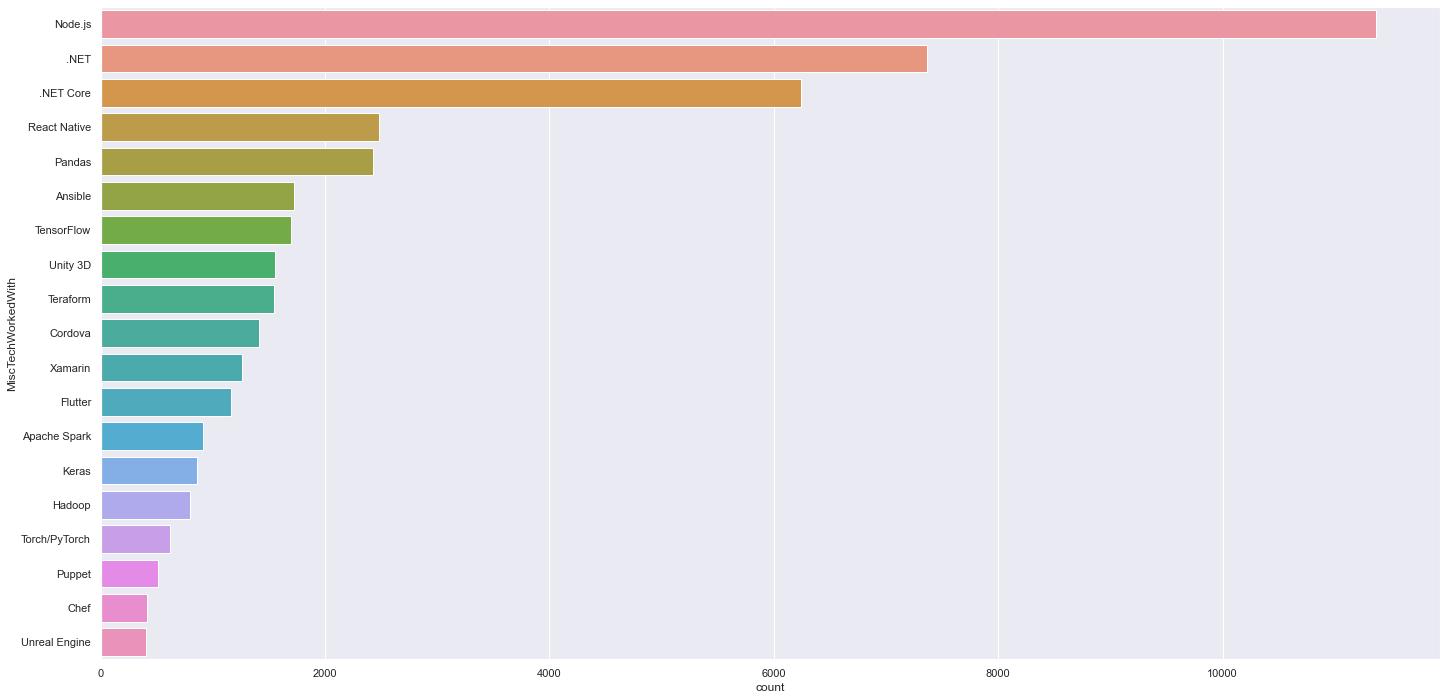

In [27]:
for key in counts:
    plt.figure(figsize=(24, 12))
    sb.barplot(data=counts[key], 
               x=counts[key]['count'], 
               y=counts[key][key], orient='h')
    plt.savefig(f'{key}.png')
    plt.show()